In [1]:
from obspy import read, Trace, Stream, UTCDateTime
from obspy.core import AttribDict
from obspy.io.segy.segy import SEGYTraceHeader, SEGYBinaryFileHeader
from obspy.io.segy.core import _read_segy
import numpy as np
import sys
import matplotlib.pyplot as plt
from numpy.random import uniform              #Используется для создания "шума"

In [2]:
stream = Stream()
num_trace=10

t0=1                                              #Начальная точка
t_start=0                                         #Первый элемент массива времени
t_finish=2                                        #Последний элемент массива времени
t_step=0.002                                    #Шаг по времени с которым производятся вычисления
tmas=np.arange(t_start,t_finish+t_step,t_step)    #Массив времени заданным шагом
A=50

for _i in range(num_trace):                        ##Цикл вызывается каждый раз при создании новой трассы
    data = A*np.exp(-((tmas-t0)/0.5)**2)          
    data = np.require(data, dtype=np.float32)
    trace = Trace(data=data)
    trace.stats.delta = 0.01                       ## Атрибут trace.stats будет переписывать все в trace.stats.segy.trace_header
                                                   ## SEGY не поддерживает точность сотых долей секунды, они будут отброшены
    trace.stats.starttime = UTCDateTime(2011,11,11,11,11,11)   ## Всемирное координированное время (UTC)

 # Если вы хотите установить некоторые дополнительные атрибуты в заголовке трассировки,
 # добавьте один и установите только те атрибуты, которые вы хотите установить. В противном случае ... 
 # заголовок будет создан для вас со значениями по умолчанию.
    if not hasattr(trace.stats, 'segy.trace_header'):     ## Возвращает флаг, указывающий на то, содержит ли объект указанный атрибут hasattr(obj, name) -> bool
         trace.stats.segy = {}                            ## Словарь/набор
    trace.stats.segy.trace_header = SEGYTraceHeader()
    trace.stats.segy.trace_header.trace_sequence_number_within_line = _i + 1
    trace.stats.segy.trace_header.receiver_group_elevation = 500

 # Добавить трассу в stream
    stream.append(trace)

In [3]:
stream.stats = AttribDict()
stream.stats.textual_file_header = 'Textual Header!'
stream.stats.binary_file_header = SEGYBinaryFileHeader()
stream.stats.binary_file_header.trace_sorting_code = 5

#print ("Объект stream перед записью...", '\n', stream)

In [4]:
stream.write("TEST.sgy", format="SEGY", data_encoding=1, byteorder=sys.byteorder)

In [5]:
%%time
print ("Чтение с помощью obspy.io.segy...")
st1 = _read_segy("TEST.sgy")
#print (st1)

Чтение с помощью obspy.io.segy...
Wall time: 26 ms


In [6]:
data1 = np.stack(t.data for t in st1.traces)   

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
print(data1.shape, '\n',
    'Количество трасс: ', data1.shape[0], '\n',
     'Количество элементов в каждой трассе (?): ', data1.shape[1], sep='')

(10, 1001)
Количество трасс: 10
Количество элементов в каждой трассе (?): 1001


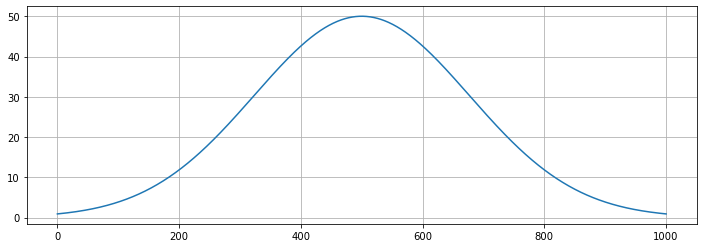

In [8]:
trace5 = st1.traces[5]

plt.figure(figsize=(12, 4))
plt.plot(trace5.data)
plt.grid(True)
plt.show()

100 процентов амплитуды 50; максимальная амплитуда 50


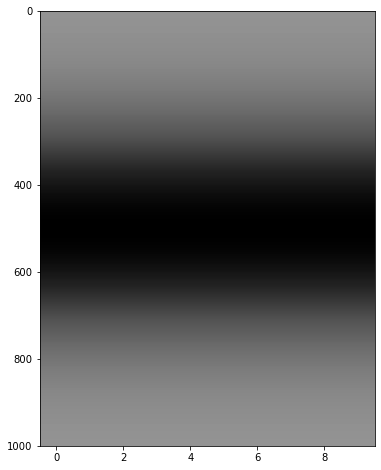

In [9]:
vm = np.percentile(data1, 100)      
print("100 процентов амплитуды {:.0f}; максимальная амплитуда {:.0f}".format(vm, data1.max()))
plt.figure(figsize=(6,8))
plt.imshow(data1.T, cmap="Greys", vmin=-vm, vmax=vm, aspect='auto')

In [10]:
stream = Stream()
num_trace=10

t0=1                                              #Начальная точка
t_start=0                                         #Первый элемент массива времени
t_finish=2                                        #Последний элемент массива времени
t_step=0.002                                      #Шаг по времени с которым производятся вычисления
tmas=np.arange(t_start,t_finish+t_step,t_step)    #Массив времени заданным шагом
N=len(tmas)
a=10
A=50

for _i in range(num_trace):                        ##Цикл вызывается каждый раз при создании новой трассы
    data = A*np.exp(-((tmas-t0)/0.5)**2)
    noise = uniform(-a,a, N)
    data = data + noise
    data = np.require(data, dtype=np.float32)
    trace = Trace(data=data)
    trace.stats.delta = 0.01                       ## Атрибут trace.stats будет переписывать все в trace.stats.segy.trace_header
                                                   ## SEGY не поддерживает точность сотых долей секунды, они будут отброшены
    trace.stats.starttime = UTCDateTime(2011,11,11,11,11,11)   ## Всемирное координированное время (UTC)

 # Если вы хотите установить некоторые дополнительные атрибуты в заголовке трассировки,
 # добавьте один и установите только те атрибуты, которые вы хотите установить. В противном случае ... 
 # заголовок будет создан для вас со значениями по умолчанию.
    if not hasattr(trace.stats, 'segy.trace_header'):     ## Возвращает флаг, указывающий на то, содержит ли объект указанный атрибут hasattr(obj, name) -> bool
         trace.stats.segy = {}                            ## Словарь/набор
    trace.stats.segy.trace_header = SEGYTraceHeader()
    trace.stats.segy.trace_header.trace_sequence_number_within_line = _i + 1
    trace.stats.segy.trace_header.receiver_group_elevation = 500

 # Добавить трассу в stream
    stream.append(trace)

In [11]:
stream.stats = AttribDict()
stream.stats.textual_file_header = 'Textual Header!'
stream.stats.binary_file_header = SEGYBinaryFileHeader()
stream.stats.binary_file_header.trace_sorting_code = 5

#print ("Объект stream перед записью...", '\n', stream)

In [12]:
stream.write("TEST_noise.sgy", format="SEGY", data_encoding=1, byteorder=sys.byteorder)

In [13]:
%%time
print ("Чтение с помощью obspy.io.segy...")
st1 = _read_segy("TEST_noise.sgy")
#print (st1)

Чтение с помощью obspy.io.segy...
Wall time: 23 ms


In [14]:
data1 = np.stack(t.data for t in st1.traces)   

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [15]:
print(data1.shape, '\n',
    'Количество трасс: ', data1.shape[0], '\n',
     'Количество элементов в каждой трассе (?): ', data1.shape[1], sep='')

(10, 1001)
Количество трасс: 10
Количество элементов в каждой трассе (?): 1001


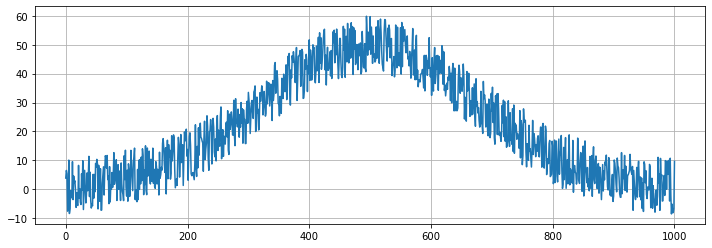

In [16]:
trace5 = st1.traces[5]

plt.figure(figsize=(12, 4))
plt.plot(trace5.data)
plt.grid(True)
plt.show()

100 процентов амплитуды 60; максимальная амплитуда 60


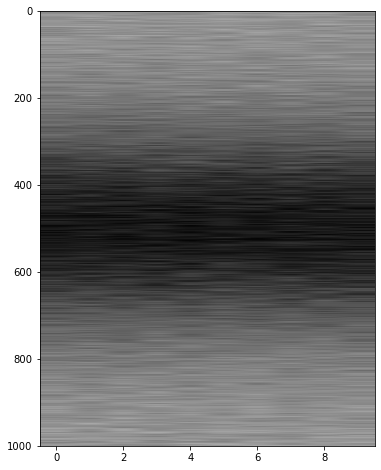

In [17]:
vm = np.percentile(data1, 100)      
print("100 процентов амплитуды {:.0f}; максимальная амплитуда {:.0f}".format(vm, data1.max()))
plt.figure(figsize=(6,8))
plt.imshow(data1.T, cmap="Greys", vmin=-vm, vmax=vm, aspect='auto')

In [18]:
from  pylab import *
import pywt

In [19]:
v='bior4.4'
def lowpassfilter(signal, thresh, wavelet=v):
    thresh = thresh*nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, level=8, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode='soft' ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal

In [20]:
S=data.shape[0]
n=0
data_filter=[]
while n<10:
    reconstructed_signal=lowpassfilter(data1[n], 0.6)
    data_filter.append(reconstructed_signal)
    n+=1
data_filter=np.array(data_filter)

D:\Anaconda\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


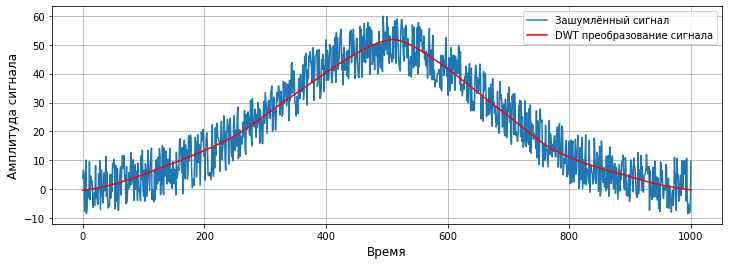

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(data1[5], label='Зашумлённый сигнал')
plt.plot(data_filter[5], color='r', label='DWT преобразование сигнала')
plt.grid(True)
plt.ylabel('Амплитуда сигнала', fontsize=12), plt.xlabel('Время', fontsize=12)
plt.legend()
plt.show()

100 процентов амплитуды 53; максимальная амплитуда 53


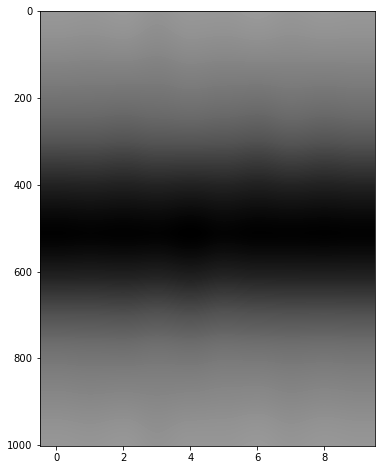

In [22]:
vm = np.percentile(data_filter, 100)      
print("100 процентов амплитуды {:.0f}; максимальная амплитуда {:.0f}".format(vm, data_filter.max()))
plt.figure(figsize=(6,8))
plt.imshow(data_filter.T, cmap="Greys", vmin=-vm, vmax=vm, aspect='auto')

In [23]:
from obspy.signal.filter import bandpass, bandstop, highpass, lowpass
from IPython.html.widgets import interact

D:\Anaconda\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [24]:
def filter_highpass (freq):
    data_highpass=highpass(data1, freq, 500, corners=4, zerophase=False)
    plt.figure(figsize=(6,8))
    #plt.imshow(data1.T, cmap="Greys", aspect='auto')
    plt.imshow(data_highpass.T, cmap="Greys", aspect='auto')


i = interact (filter_highpass,
              freq =(1,249))

interactive(children=(IntSlider(value=125, description='freq', max=249, min=1), Output()), _dom_classes=('widg…

In [25]:
def filter_lowpass (freq):
    data_lowpass=lowpass(data1, freq, 500, corners=4, zerophase=True)
    plt.figure(figsize=(6,8))
    plt.imshow(data_lowpass.T, cmap="Greys", aspect='auto')


i = interact (filter_lowpass, 
              freq =(1,249))

interactive(children=(IntSlider(value=125, description='freq', max=249, min=1), Output()), _dom_classes=('widg…

In [26]:
def filter_bandpass (freqmin, freqmax):
    data_bandpass=bandpass(data1, freqmin, freqmax, 500, corners=4, zerophase=False)
    #print('Filter ' ,data_bandpass, '\n', 'No filter', Data, sep='')
    plt.figure(figsize=(6,12))
    plt.imshow(data_bandpass.T, cmap="Greys", aspect='auto')  #vmin= -min(data_bandpass), vmax=max(data_bandpass),


i = interact (filter_bandpass, 
              freqmin =(1,125), 
              freqmax = (125,249))

interactive(children=(IntSlider(value=63, description='freqmin', max=125, min=1), IntSlider(value=187, descrip…

In [27]:
def filter_bandstop (freqmin, freqmax):
    data_bandstop=bandstop(data1, freqmin, freqmax, 500, corners=4, zerophase=False)
    #print('Filter ' ,data_bandpass, '\n', 'No filter', Data, sep='')
    plt.figure(figsize=(6,8))
    plt.imshow(data_bandstop.T, cmap="Greys", aspect='auto')


i = interact (filter_bandstop, 
              freqmin =(1,125), 
              freqmax = (125,249))

interactive(children=(IntSlider(value=63, description='freqmin', max=125, min=1), IntSlider(value=187, descrip…